In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA # The Model
from pmdarima import auto_arima # For choosing the best parameter for the model
from sklearn.metrics import mean_absolute_error # for evaluation

In [ ]:
data= pd.read_csv(r"Air_Quality_Seoul_2017-2020.csv", parse_dates=["Measurement date"])
# , index_col=["Measurement date"]

In [ ]:
data.head(5)

,Measurement date,Station code,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00:00,101,0.004,0.059,0.002,1.2,73.0,57
1,2017-01-01 01:00:00,101,0.004,0.058,0.002,1.2,71.0,59
2,2017-01-01 02:00:00,101,0.004,0.056,0.002,1.2,70.0,59
3,2017-01-01 03:00:00,101,0.004,0.056,0.002,1.2,70.0,58
4,2017-01-01 04:00:00,101,0.003,0.051,0.002,1.2,69.0,61


In [ ]:
data.shape

(866459, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866459 entries, 0 to 866458
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Measurement date  866459 non-null  datetime64[ns]
 1   Station code      866459 non-null  int64         
 2   SO2               866459 non-null  float64       
 3   NO2               866459 non-null  float64       
 4   O3                866459 non-null  float64       
 5   CO                866459 non-null  float64       
 6   PM10              866459 non-null  float64       
 7   PM2.5             866459 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 52.9 MB


In [ ]:
data.columns

Index(['Measurement date', 'Station code', 'SO2', 'NO2', 'O3', 'CO', 'PM10',
       'PM2.5'],
      dtype='object')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum().sort_values(ascending=True)

Measurement date    0
Station code        0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64

In [ ]:
data.describe()

,Measurement date,Station code,SO2,NO2,O3,CO,PM10,PM2.5
count,866459,866459.00000,866459.000000,866459.000000,866459.000000,866459.000000,866459.000000,866459.000000
mean,2018-12-30 16:58:27.293016832,113.00019,0.004109,0.027716,0.024690,0.512873,42.376718,24.829983
min,2017-01-01 00:00:00,101.00000,0.001000,0.001000,0.001000,0.100000,1.000000,1.000000
25%,2017-12-28 00:00:00,107.00000,0.003000,0.015000,0.010000,0.300000,22.000000,11.000000
50%,2018-12-24 01:00:00,113.00000,0.004000,0.024000,0.022000,0.500000,34.000000,19.000000
75%,2020-01-04 21:00:00,119.00000,0.005000,0.037000,0.034000,0.600000,51.000000,30.000000
max,2020-12-31 23:00:00,125.00000,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000
std,NaN,7.21125,0.007103,0.080270,0.050622,0.419615,66.549338,42.969996


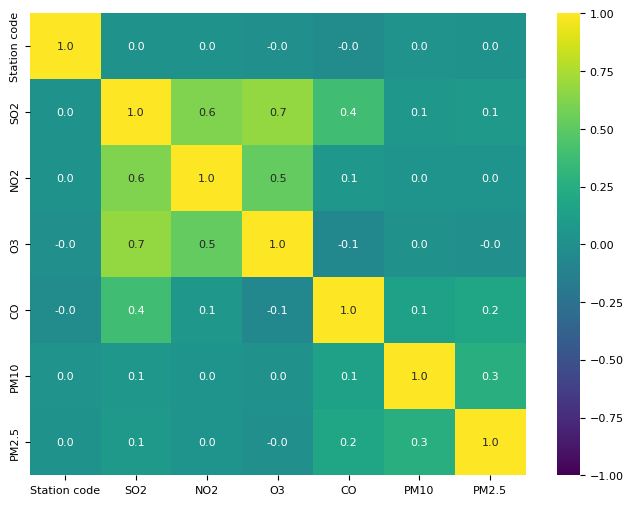

In [ ]:
df= data.drop('Measurement date',axis=1)
corr_matrix = df.corr()
plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 8})
sns.heatmap(corr_matrix, cmap = 'viridis', vmin = -1, vmax = 1,annot=True,fmt=".1f")
plt.show()

In [ ]:
data = data.rename(columns={'Measurement date':'Measurement_Date'})

In [ ]:
data

,Measurement_Date,Station code,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00:00,101,0.004,0.059,0.002,1.2,73.0,57
1,2017-01-01 01:00:00,101,0.004,0.058,0.002,1.2,71.0,59
2,2017-01-01 02:00:00,101,0.004,0.056,0.002,1.2,70.0,59
3,2017-01-01 03:00:00,101,0.004,0.056,0.002,1.2,70.0,58
4,2017-01-01 04:00:00,101,0.003,0.051,0.002,1.2,69.0,61
...,...,...,...,...,...,...,...,...
866454,2020-12-31 19:00:00,125,0.003,0.034,0.009,0.5,35.0,19
866455,2020-12-31 20:00:00,125,0.003,0.030,0.012,0.5,34.0,20
866456,2020-12-31 21:00:00,125,0.003,0.027,0.015,0.5,33.0,18
866457,2020-12-31 22:00:00,125,0.003,0.021,0.020,0.4,35.0,18


In [ ]:
data['Date'] = data['Measurement_Date'].dt.date
data['Day'] = data['Measurement_Date'].dt.day
data['Month'] = data['Measurement_Date'].dt.month
data['Year'] = data['Measurement_Date'].dt.year
data['Hour'] = data['Measurement_Date'].dt.hour
data['Time'] = data['Measurement_Date'].dt.time

In [ ]:
data

,Measurement_Date,Station code,SO2,NO2,O3,CO,PM10,PM2.5,Date,Day,Month,Year,Hour,Time
0,2017-01-01 00:00:00,101,0.004,0.059,0.002,1.2,73.0,57,2017-01-01,1,1,2017,0,00:00:00
1,2017-01-01 01:00:00,101,0.004,0.058,0.002,1.2,71.0,59,2017-01-01,1,1,2017,1,01:00:00
2,2017-01-01 02:00:00,101,0.004,0.056,0.002,1.2,70.0,59,2017-01-01,1,1,2017,2,02:00:00
3,2017-01-01 03:00:00,101,0.004,0.056,0.002,1.2,70.0,58,2017-01-01,1,1,2017,3,03:00:00
4,2017-01-01 04:00:00,101,0.003,0.051,0.002,1.2,69.0,61,2017-01-01,1,1,2017,4,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866454,2020-12-31 19:00:00,125,0.003,0.034,0.009,0.5,35.0,19,2020-12-31,31,12,2020,19,19:00:00
866455,2020-12-31 20:00:00,125,0.003,0.030,0.012,0.5,34.0,20,2020-12-31,31,12,2020,20,20:00:00
866456,2020-12-31 21:00:00,125,0.003,0.027,0.015,0.5,33.0,18,2020-12-31,31,12,2020,21,21:00:00
866457,2020-12-31 22:00:00,125,0.003,0.021,0.020,0.4,35.0,18,2020-12-31,31,12,2020,22,22:00:00


In [ ]:
data = data.set_index('Measurement_Date')
data

,Station code,SO2,NO2,O3,CO,PM10,PM2.5,Date,Day,Month,Year,Hour,Time
Measurement_Date,,,,,,,,,,,,,
2017-01-01 00:00:00,101,0.004,0.059,0.002,1.2,73.0,57,2017-01-01,1,1,2017,0,00:00:00
2017-01-01 01:00:00,101,0.004,0.058,0.002,1.2,71.0,59,2017-01-01,1,1,2017,1,01:00:00
2017-01-01 02:00:00,101,0.004,0.056,0.002,1.2,70.0,59,2017-01-01,1,1,2017,2,02:00:00
2017-01-01 03:00:00,101,0.004,0.056,0.002,1.2,70.0,58,2017-01-01,1,1,2017,3,03:00:00
2017-01-01 04:00:00,101,0.003,0.051,0.002,1.2,69.0,61,2017-01-01,1,1,2017,4,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,125,0.003,0.034,0.009,0.5,35.0,19,2020-12-31,31,12,2020,19,19:00:00
2020-12-31 20:00:00,125,0.003,0.030,0.012,0.5,34.0,20,2020-12-31,31,12,2020,20,20:00:00
2020-12-31 21:00:00,125,0.003,0.027,0.015,0.5,33.0,18,2020-12-31,31,12,2020,21,21:00:00


In [ ]:
df= pd.DataFrame(data['PM2.5'])
df

,PM2.5
Measurement_Date,
2017-01-01 00:00:00,57
2017-01-01 01:00:00,59
2017-01-01 02:00:00,59
2017-01-01 03:00:00,58
2017-01-01 04:00:00,61
...,...
2020-12-31 19:00:00,19
2020-12-31 20:00:00,20
2020-12-31 21:00:00,18


In [ ]:
df = df.resample('M').mean()
df

C:\Users\zain\AppData\Local\Temp\ipykernel_4624\1851226990.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').mean()


,PM2.5
Measurement_Date,
2017-01-31,32.627796
2017-02-28,28.668214
2017-03-31,39.831398
2017-04-30,26.519333
2017-05-31,24.398495
2017-06-30,22.528111
2017-07-31,22.369032
2017-08-31,12.703817
2017-09-30,18.927833


In [ ]:
len(df)

48

In [ ]:
ts= df['PM2.5']
ts

Measurement_Date
2017-01-31    32.627796
2017-02-28    28.668214
2017-03-31    39.831398
2017-04-30    26.519333
2017-05-31    24.398495
2017-06-30    22.528111
2017-07-31    22.369032
2017-08-31    12.703817
2017-09-30    18.927833
2017-10-31    15.271828
2017-11-30    22.097056
2017-12-31    31.177742
2018-01-31    32.050968
2018-02-28    29.919524
2018-03-31    34.178333
2018-04-30    27.449389
2018-05-31    24.471774
2018-06-30    26.983611
2018-07-31    16.980000
2018-08-31    16.589032
2018-09-30    11.824556
2018-10-31    16.405484
2018-11-30    29.742722
2018-12-31    26.443602
2019-01-31    41.236339
2019-02-28    38.929583
2019-03-31    52.852734
2019-04-30    23.129736
2019-05-31    31.292396
2019-06-30    23.836278
2019-07-31    23.463237
2019-08-31    19.781557
2019-09-30    17.909816
2019-10-31    18.163065
2019-11-30    22.767056
2019-12-31    30.576776
2020-01-31    31.401935
2020-02-29    29.664023
2020-03-31    26.622849
2020-04-30    22.906722
2020-05-31    20.812849

<Axes: xlabel='Measurement_Date'>

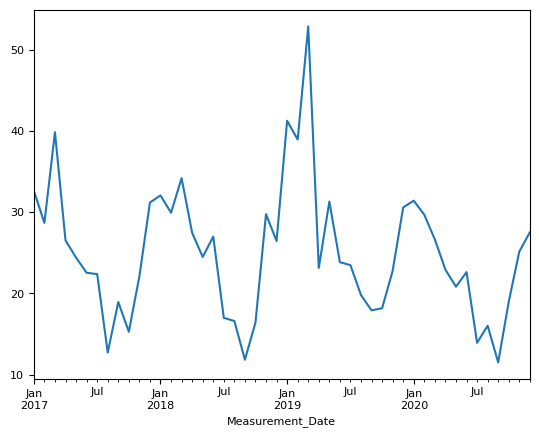

In [ ]:
ts.plot()

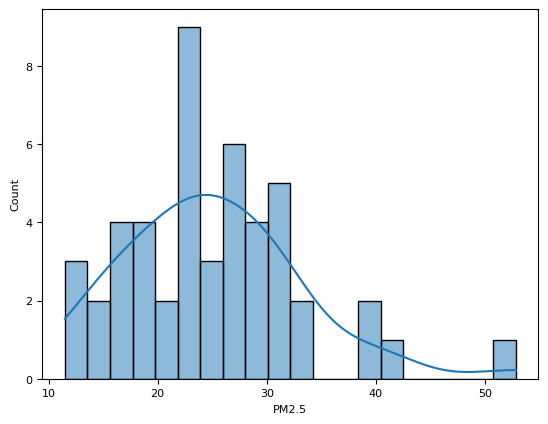

In [ ]:
#To check ,follow a normal distribution or skewed distribution
sns.histplot(df['PM2.5'],bins=20, kde=True)
plt.show()

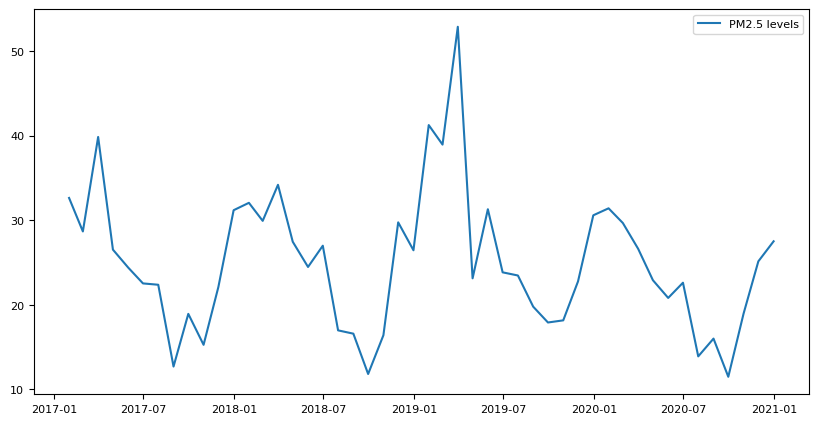

In [ ]:
#time series visualization
plt.figure(figsize=(10,5))
plt.plot(df["PM2.5"],label= "PM2.5 levels")
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
#ts = ts.asfreq('M')
#Decomposeition to analyze trend and seasonality
decomposition = sm.tsa.seasonal_decompose(ts,period=12)  #Monthly Data with Yearly Seasonality

In [ ]:
decomposition

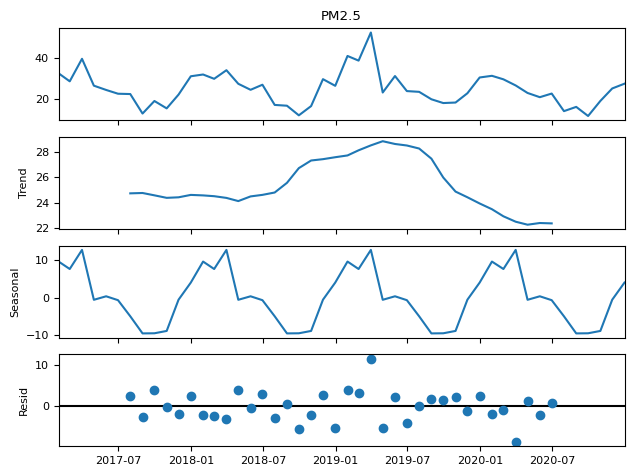

In [ ]:
fig =decomposition.plot()
plt.show()

In [ ]:
#print(ts.index.freq)

In [ ]:
df_train = df.iloc[:36]
df_test = df.iloc[36:]
print(len(df_train))
print(len(df_test))
print(len(ts))

36
12
48


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adftest= adfuller(ts)
adftest

(-4.3648418365929365,
 0.00034237297516677624,
 3,
 44,
 {'1%': -3.5885733964124715,
  '5%': -2.929885661157025,
  '10%': -2.6031845661157025},
 244.01416620606972)

In [ ]:
H0= "Series is not stationary"
Ha= "Series is stationary"

def stationary_check(s):
  if adfuller(s)[1] > 0.05:
    print(f"we accept null hypothesis, value of p is :{adfuller(s)[1]}", H0)
  else:
    print(f"we reject null hypothesis {adfuller(s)[1]}", Ha)

In [ ]:
stationary_check(ts)

we reject null hypothesis 0.00034237297516677624 Series is stationary


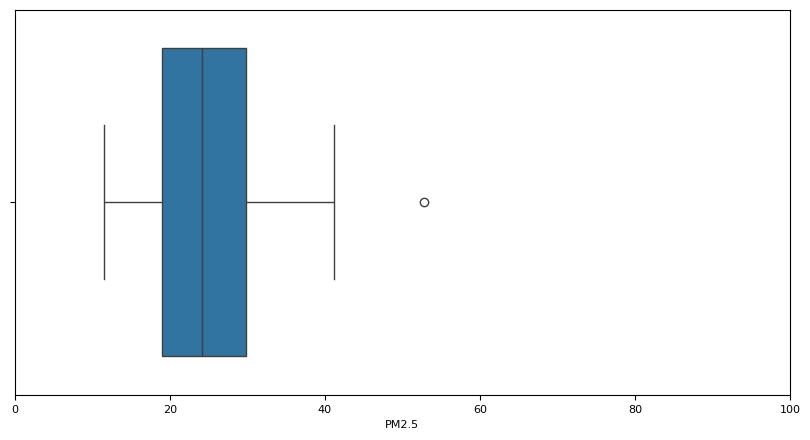

In [ ]:
#outliers detection
plt.figure(figsize=(10,5))
sns.boxplot(x=df["PM2.5"])
plt.xlim(0,100)
plt.show()

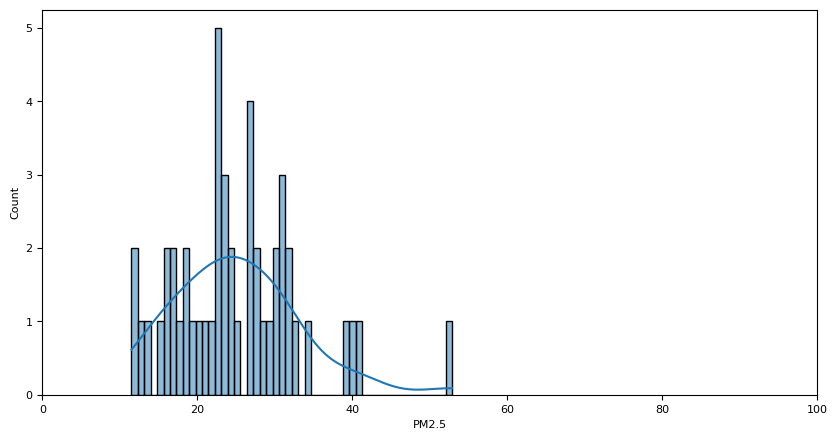

In [ ]:
#to adjust x-axis
plt.figure(figsize=(10,5))
sns.histplot(df["PM2.5"],bins=50, kde=True)
plt.xlim(0,100)
plt.show()

In [ ]:
#check skewness
from scipy.stats import skew
skewness= skew(df["PM2.5"].dropna())
print(f"skewness : {skewness}")
#if skewness > 1,the data is right skewed
#if skewness = 0, it is normally distributed

skewness : 0.8418408074444935


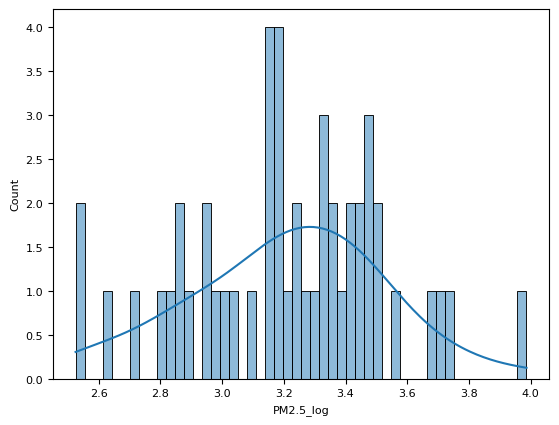

In [ ]:
#log transformation
#since PM2.5 is likely right skewed, you apply log transformation to make it more normal.
df["PM2.5_log"]= np.log1p(df["PM2.5"]) #log1p to handle zeros.
sns.histplot(df["PM2.5_log"],bins=50, kde= True)
plt.show()
#this transformation helps stabilize variance and improve model performance.

In [ ]:
skewness= skew(df["PM2.5_log"].dropna())
print(f"skewness : {skewness}")

skewness : -0.14164734964298348


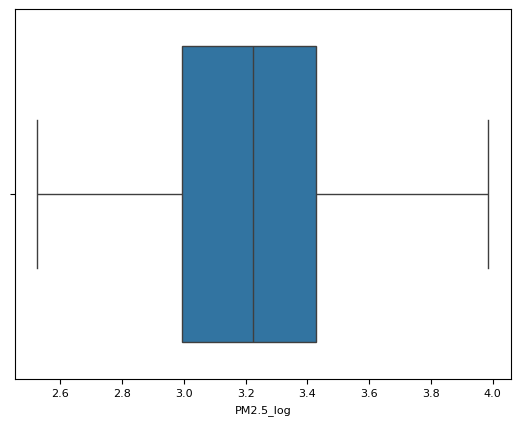

In [ ]:
#use log transformation for better visualization and reduce the impact of extreme values.
sns.boxplot(x=df["PM2.5_log"])
plt.show()

In [ ]:
df

,PM2.5,PM2.5_log
Measurement_Date,,
2017-01-31,32.627796,3.515353
2017-02-28,28.668214,3.390076
2017-03-31,39.831398,3.709451
2017-04-30,26.519333,3.314889
2017-05-31,24.398495,3.234690
2017-06-30,22.528111,3.158196
2017-07-31,22.369032,3.151412
2017-08-31,12.703817,2.617674
2017-09-30,18.927833,2.992117


In [ ]:
#from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

'\nplot_acf(df["PM2.5"])\nplt.show()\nplot_acf(df["PM2.5"],lags=30)\nplt.show()\n'

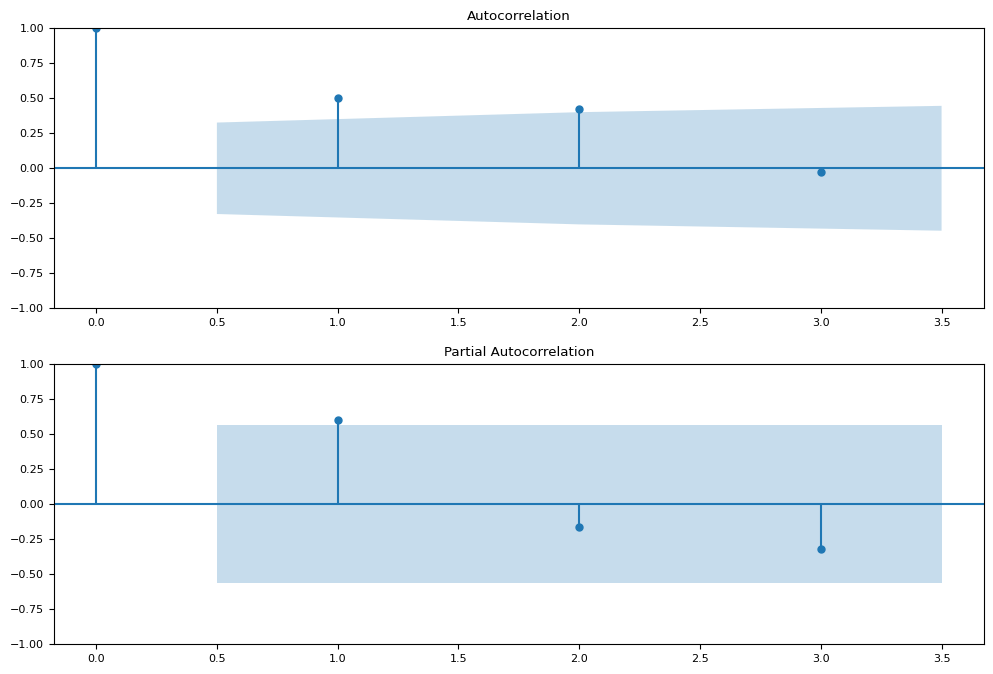

In [ ]:

fig =plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(df["PM2.5"].iloc[:36],lags=3,ax=ax1)
ax2= fig.add_subplot(212)
fig= sm.graphics.tsa.plot_pacf(df["PM2.5"].iloc[36:],lags=3,ax=ax2)
'''
plot_acf(df["PM2.5"])
plt.show()
plot_acf(df["PM2.5"],lags=30)
plt.show()
'''

In [ ]:
stepwise =auto_arima(df_train,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=260.515, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=251.993, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=256.669, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=342.296, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=252.177, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=253.354, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=251.642, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=240.713, Time=0.25 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=246.520, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=242.117, Time=0.82 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=238.508, Time=0.99 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=239.006, Time=0.65 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=243.358, Time

In [ ]:
best_order = stepwise.get_params()['order']
best_order

(3, 0, 2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(df_train,order=(3,0,2)).fit() #previous best_order value (2,0,3)

c:\users\zain\my_tensorflow\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\zain\my_tensorflow\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#predict on test data:
print(len(df) - len(df_train))
print(len(df_train))
print(len(df_test))
print(len(ts))

12
36
12
48


In [ ]:
#pred = model.predict(start=38 ,end =49)
#pred
pred_train = model.predict(start=1,end=len(df_train))
pred_test =model.predict(start=len(df_train),end=(len(df_train) + len(df_test)-1))

In [ ]:
mean_absolute_error(df_train['PM2.5'],pred_train)

4.929934382861806

In [ ]:
mean_absolute_error(df_test['PM2.5'],pred_test)

3.924621257355275

In [ ]:
pred_train.index = df_train.index

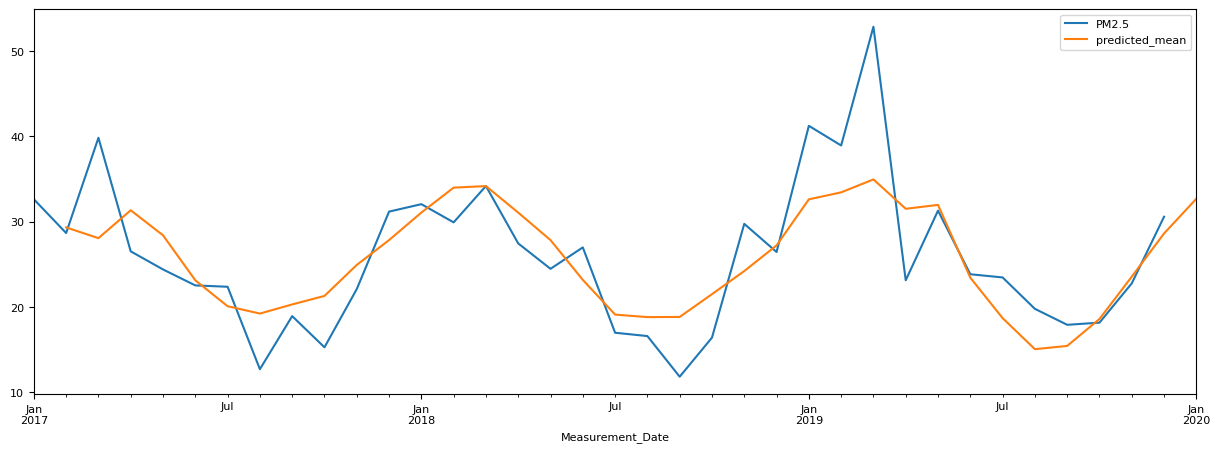

In [ ]:
df_train['PM2.5'].plot(figsize=(15,5))
pred_train.plot(figsize=(15,5))
plt.legend()

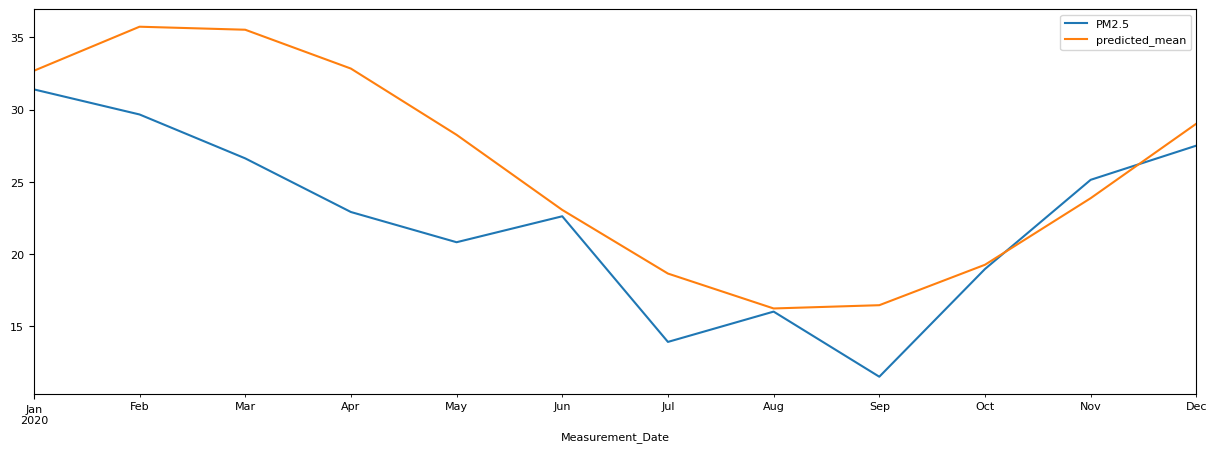

In [ ]:
pred_test.index = df_test.index

df_test['PM2.5'].plot(figsize=(15,5))
pred_test.plot(figsize=(15,5))
plt.legend()

<Axes: xlabel='Measurement_Date'>

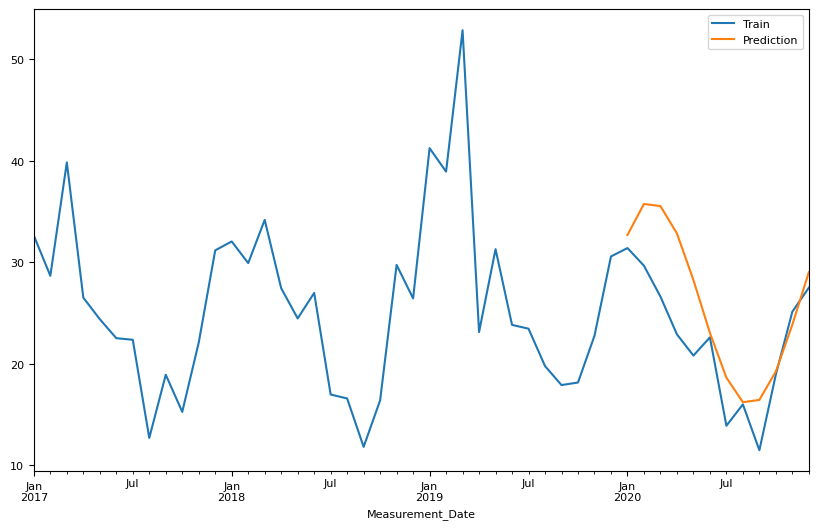

In [ ]:
df["PM2.5"].plot(legend= True,label="Train",figsize=(10,6))
pred_test.plot(legend= True,label="Prediction")

In [ ]:
import statsmodels.api as sm

In [ ]:
model= sm.tsa.statespace.SARIMAX(df['PM2.5'],order=(3,0,2),seasonal_order=(3,0,2,12))  #previous value (2,0,3)
results= model.fit()

c:\users\zain\my_tensorflow\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\zain\my_tensorflow\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Measurement_Date'>

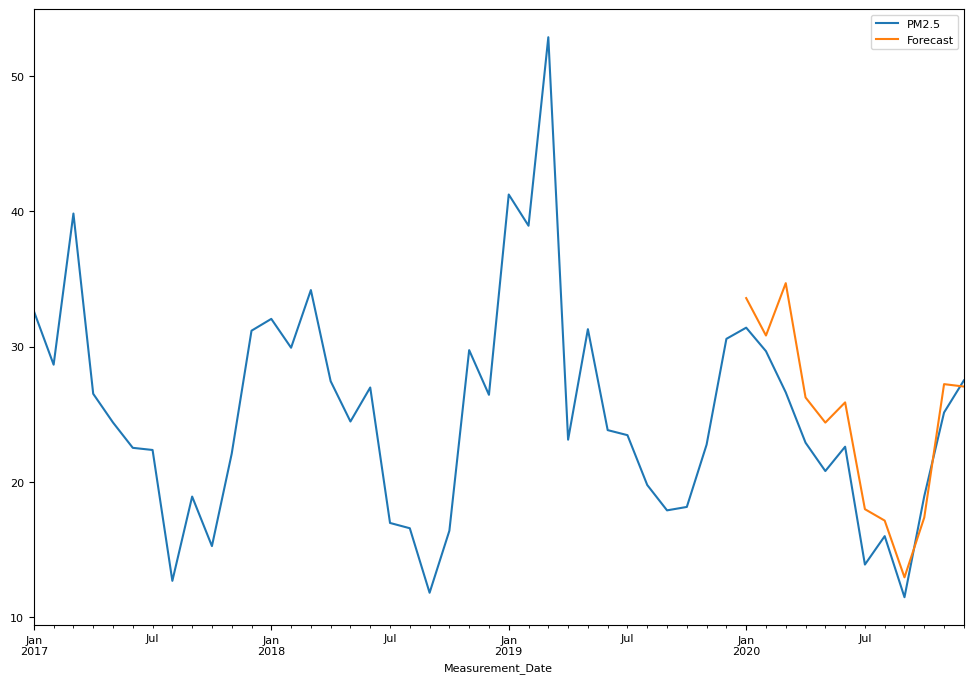

In [ ]:
df["Forecast"]= results.predict(start=len(df_train),end=(len(df_train) + len(df_test)-1),dynamic=True)
df[["PM2.5","Forecast"]].plot(figsize=(12,8))

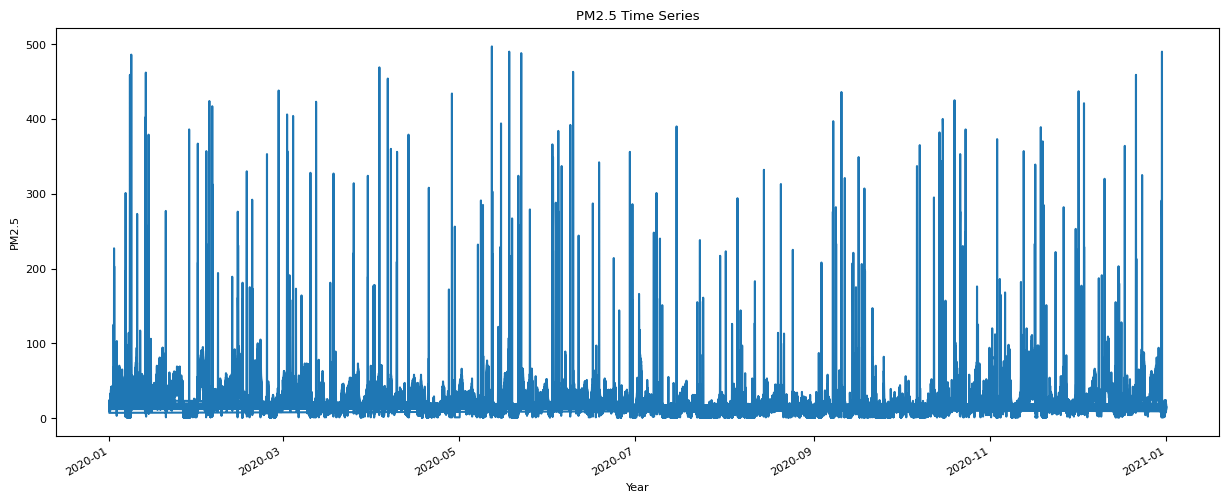

In [ ]:
#Create a time series plot of the "PM2.5" readings
fig, ax = plt.subplots(figsize=(15, 6))
df["PM2.5"].plot(xlabel="Year", ylabel="PM2.5", title="PM2.5 Time Series", ax=ax);